In [1]:
import pandas as ps
import numpy as np
from scipy import stats
# from google.colab import drive

def openFile(path):
    return ps.read_csv(path, index_col=0) #index_col=0 has the effect of excluding any unnamed fields

def toDF(rawData):
    return ps.DataFrame(rawData)

# drive.mount('/content/drive')
df = toDF(openFile('../cleaned.csv'))
df = df[(np.abs(stats.zscore(df[["year", "price", "points"]])) < 3).all(axis=1)]

In [2]:
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Basic Linear Regression 1/5

0.29814633357371345

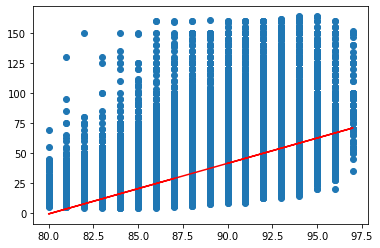

In [3]:
x = df["points"].values.reshape(-1,1)
y = df["price"].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)
model = LinearRegression()
model.fit(x_train,y_train)
plt.scatter(x, y)
plt.plot(x, model.predict(x), color='red')
model.score(x_test,y_test)

In [4]:
x = df[["year","points"]].values
y = df["price"].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)
model = LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.2981481504312852

# Polynomial Regression 2/5

0.33549730050801807


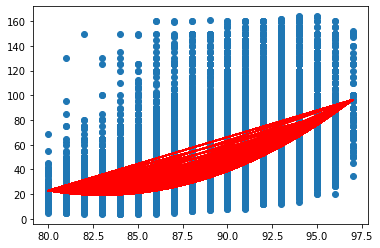

In [5]:
#https://data36.com/polynomial-regression-python-scikit-learn/
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
poly = PolynomialFeatures(degree=2, include_bias=False)
x = df["points"].values.reshape(-1,1)
y = df["price"].values.reshape(-1,1)
poly_features = poly.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.25, random_state=42)
poly_reg_model = LinearRegression()
poly_reg_model.fit(x_train, y_train)
plt.scatter(x, y)
plt.plot(x, poly_reg_model.predict(poly_features), color='red')
print(poly_reg_model.score(x_test,y_test))

# K-Means by year and points, then a linear regression 3/5

In [6]:
numCluster = 4
scaler = StandardScaler()
scaled_kmeans = ps.DataFrame(scaler.fit_transform(df[["price", "points", "year"]]),columns=["price","points", "year"])
newDF = ps.DataFrame()
newDF['points'] = df.points
newDF['year'] = df.year
newDF['price'] = df.price

for i in range(2, numCluster+1):
  kmeans = KMeans(n_clusters = i).fit(scaled_kmeans)
  newDF['label'] = kmeans.labels_
  print("Number of clusters: ", i)
  for j in range(0, i):
    x = newDF[newDF.label == j][["points", "year"]].values
    y = newDF[newDF.label == j]["price"].values.reshape(-1,1)
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)
    model = LinearRegression()
    model.fit(x_train,y_train)
    print("Cluster number " + str(j) + " : " + str(model.score(x_test,y_test)))
  print()

C:\Users\Bing Xiong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters:  2
Cluster number 0 : 0.016611134405487005
Cluster number 1 : 0.009009047980154339



C:\Users\Bing Xiong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters:  3
Cluster number 0 : 0.07587228493267639
Cluster number 1 : 0.02890427003999496
Cluster number 2 : 0.01395853843866568



C:\Users\Bing Xiong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters:  4
Cluster number 0 : 0.007279203928695521
Cluster number 1 : 0.0035902052664698036
Cluster number 2 : 0.012281932702721265
Cluster number 3 : 0.08278411606492286



# Logistic Regression with K-Means on price 4/5

In [7]:
from sklearn.linear_model import LogisticRegression

clusterPrices = KMeans(n_clusters = 3).fit(df[["price"]])
logRegDF = ps.DataFrame()
logRegDF["year"] = df.year
logRegDF["points"] = df.points
logRegDF['label'] = clusterPrices.labels_

x = logRegDF[["year","points"]].values
y = logRegDF["label"].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

logreg = LogisticRegression(random_state=16)

logreg.fit(x_train, y_train)

logreg.score(x_test,y_test)

C:\Users\Bing Xiong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Bing Xiong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6921332046332046

# Model found outside class 5/5

In [8]:
#https://www.saedsayad.com/decision_tree_reg.htm
from sklearn.tree import DecisionTreeRegressor

x = df[["price","year"]].values
y = df["points"].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)
dtr = DecisionTreeRegressor(max_depth=12)
dtr.fit(x_train, y_train)
dtr.score(x_test,y_test)

0.3492970856055593

In [9]:
countryDict = {}
countryCtr = 0
regionDict = {}
regionCtr = 0
varietyDict = {}
varietyCtr = 0
treeDF = df.copy()
for country in treeDF["country"]:
  if country not in countryDict:
    countryDict[country] = countryCtr
    countryCtr += 1
for region in treeDF["region_1"]:
  if region not in regionDict:
    regionDict[region] = regionCtr
    regionCtr += 1
for variety in treeDF["variety"]:
  if variety not in varietyDict:
    varietyDict[variety] = varietyCtr
    varietyCtr += 1
countryCol = []
varietyCol = []
regionCol = []
for frame in treeDF.iterrows():
  countryCol.append(countryDict[frame[1]["country"]])
  varietyCol.append(varietyDict[frame[1]["variety"]])
  regionCol.append(regionDict[frame[1]["region_1"]])
treeDF["countryCode"] = countryCol
treeDF["regionCode"] = regionCol
treeDF["varietyCode"] = varietyCol

x = treeDF[["price","year", "countryCode", "regionCode", "varietyCode"]].values
y = treeDF["points"].values.reshape(-1,1)
print(countryDict)
print(regionDict)
print(varietyDict)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)
dtr = DecisionTreeRegressor(max_depth=8)
dtr.fit(x_train, y_train)
dtr.score(x_test,y_test)


{'US': 0, 'Spain': 1, 'Italy': 2, 'France': 3, 'Argentina': 4, 'Australia': 5, 'Canada': 6}
{'Willamette Valley': 0, 'Lake Michigan Shore': 1, 'Navarra': 2, 'Vittoria': 3, 'Alsace': 4, 'Napa Valley': 5, 'Alexander Valley': 6, 'Central Coast': 7, 'Cafayate': 8, 'Mendoza': 9, 'Ribera del Duero': 10, 'Virginia': 11, 'Oregon': 12, 'Sicilia': 13, 'Paso Robles': 14, 'Sonoma Coast': 15, 'Terre Siciliane': 16, 'Cerasuolo di Vittoria': 17, 'Clarksburg': 18, 'Dry Creek Valley': 19, 'Sonoma Valley': 20, 'McMinnville': 21, 'Puglia': 22, 'Beaujolais': 23, 'Lake County': 24, 'Monticello': 25, 'Brouilly': 26, 'Monica di Sardegna': 27, 'Bordeaux Blanc': 28, 'North Coast': 29, 'Columbia Valley (WA)': 30, 'Romagna': 31, 'Santa Ynez Valley': 32, 'Chablis': 33, 'Mâcon-Milly Lamartine': 34, 'California': 35, 'Aglianico del Vulture': 36, 'Howell Mountain': 37, 'Calistoga': 38, 'South Australia': 39, 'Eola-Amity Hills': 40, 'Rías Baixas': 41, 'Vin de France': 42, 'McLaren Vale': 43, 'Ancient Lakes': 44, 'Kni

0.38542350043224805

In [10]:
import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use("TkAgg")
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure

def display_importance_bar_plot():
    importances = dtr.feature_importances_
    feature_names = ["Price", "Year", "Country Code", "Region Code", "Variety Code"]

    # Create a bar plot using the Figure class
    fig = Figure(figsize=(10, 5))
    ax = fig.add_subplot(111)
    ax.bar(feature_names, importances)
    ax.set_xlabel('Features')
    ax.set_ylabel('Importance')
    ax.set_title('Feature Importances')

    # Create a new tkinter window
    chart_window = tk.Toplevel(app)
    chart_window.title("Feature Importances")

    # Add the text widget to the new window
    importance_text = tk.Text(chart_window, wrap=tk.WORD, width=50, height=10)
    importance_text.pack(side=tk.TOP, pady=10)
    importance_text.insert(tk.END, "Feature Importances:\n")
    for i, importance in enumerate(importances):
        importance_text.insert(tk.END, f"{feature_names[i]}: {importance:.4f}\n")
    importance_text.config(state=tk.DISABLED)  # Disable editing

    # Display the plot in the new window
    canvas = FigureCanvasTkAgg(fig, master=chart_window)
    canvas.draw()
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)



def predict_points():
    price = float(price_entry.get())
    year = int(year_entry.get())
    countryCode = int(countryCode_entry.get())
    regionCode = int(regionCode_entry.get())
    varietyCode = int(varietyCode_entry.get())

    input_values = np.array([[price, year, countryCode, regionCode, varietyCode]])
    predicted_points = dtr.predict(input_values)
    

    result_label.config(text=f"Predicted points: {predicted_points[0]:.2f}")
    print(plt.get_backend())

def clear_inputs():
    price_entry.delete(0, tk.END)
    year_entry.delete(0, tk.END)
    countryCode_entry.delete(0, tk.END)
    regionCode_entry.delete(0, tk.END)
    varietyCode_entry.delete(0, tk.END)
    result_label.config(text="")

def display_dictionaries():
    display_text.delete(1.0, tk.END)  # Clear the Text widget
    display_text.insert(tk.END, "Country Codes:\n")
    for k, v in countryDict.items():
        display_text.insert(tk.END, f"{k}: {v}\n")

    display_text.insert(tk.END, "\nRegion Codes:\n")
    for k, v in regionDict.items():
        display_text.insert(tk.END, f"{k}: {v}\n")

    display_text.insert(tk.END, "\nVariety Codes:\n")
    for k, v in varietyDict.items():
        display_text.insert(tk.END, f"{k}: {v}\n")

app = tk.Tk()
app.title("Wine Points Predictor and Dictionary Display")


# Wine Points Predictor UI
predictor_frame = ttk.Frame(app, padding="10")
predictor_frame.grid(row=0, column=0, sticky=(tk.W, tk.E, tk.N, tk.S))

price_label = ttk.Label(predictor_frame, text="Price:")
price_label.grid(column=0, row=0, sticky=tk.W)
price_entry = ttk.Entry(predictor_frame)
price_entry.grid(column=1, row=0, sticky=tk.W)

year_label = ttk.Label(predictor_frame, text="Year:")
year_label.grid(column=0, row=1, sticky=tk.W)
year_entry = ttk.Entry(predictor_frame)
year_entry.grid(column=1, row=1, sticky=tk.W)

countryCode_label = ttk.Label(predictor_frame, text="Country Code:")
countryCode_label.grid(column=0, row=2, sticky=tk.W)
countryCode_entry = ttk.Entry(predictor_frame)
countryCode_entry.grid(column=1, row=2, sticky=tk.W)

regionCode_label = ttk.Label(predictor_frame, text="Region Code:")
regionCode_label.grid(column=0, row=3, sticky=tk.W)
regionCode_entry = ttk.Entry(predictor_frame)
regionCode_entry.grid(column=1, row=3, sticky=tk.W)

varietyCode_label = ttk.Label(predictor_frame, text="Variety Code:")
varietyCode_label.grid(column=0, row=4, sticky=tk.W)
varietyCode_entry = ttk.Entry(predictor_frame)
varietyCode_entry.grid(column=1, row=4, sticky=tk.W)

predict_button = ttk.Button(predictor_frame, text="Predict Points", command=predict_points)
predict_button.grid(column=0, row=5, columnspan=2, pady=10)

clear_button = ttk.Button(predictor_frame, text="Clear", command=clear_inputs)
clear_button.grid(column=0, row=6, columnspan=2, pady=10)

result_label = ttk.Label(predictor_frame, text="")
result_label.grid(column=0, row=7, columnspan=2, pady=10)

# Dictionary Display UI
dictionary_frame = ttk.Frame(app, padding="10")
dictionary_frame.grid(row=0, column=1, sticky=(tk.W, tk.E, tk.N, tk.S))

display_button = ttk.Button(dictionary_frame, text="Display Dictionaries", command=display_dictionaries)
display_button.grid(column=0, row=0, pady=10)

display_text = tk.Text(dictionary_frame, wrap=tk.WORD, width=50, height=20)
display_text.grid(column=0, row=1)

scrollbar = ttk.Scrollbar(dictionary_frame, orient="vertical", command=display_text.yview)
scrollbar.grid(column=1, row=1, sticky=(tk.N, tk.S))
display_text.config(yscrollcommand=scrollbar.set)

importance_button = ttk.Button(dictionary_frame, text="How your result was calculated", command=display_importance_bar_plot)

importance_button.grid(column=0, row=3, pady=10)


app.mainloop()


TkAgg
